# Autoencoder Para detección de fraude

 **El autoencoder tiene diferentes aplicaciones algunas son:**

*   Eliminación de ruido
*   Anonimización de datos

*   Criptografía y seguridad
*   Agrupamiento semántico

*   Generación de nuevos datos
*   Imputación de datos perdidos

*   Reducción de dimensionalidad
*   Identificación de anomalías

**En este caso mediante la identificación de anomalías, se identificará el fraude**

**El autoencoder tiene diferentes aplicaciones una de ellas es a la identificación de anomalías o datos atípicos o en ingles (outliers) es una observación que es numéricamente distante del resto de los datos.**

In [1]:
%%html
<p style='text-align: justify;'> <b>Una aplicación del autoencoder es la reducción de ruido en una imagen, se debe tener un dato de entrada, luego un codificador, se comprime la imagen y un decodificador para que la imagen este sin ruido. En este caso el dato de entrada es una imagen con ruido y el dato de salida es la misma imagen sin ruido(ver imagen a continuación) </b> </p>


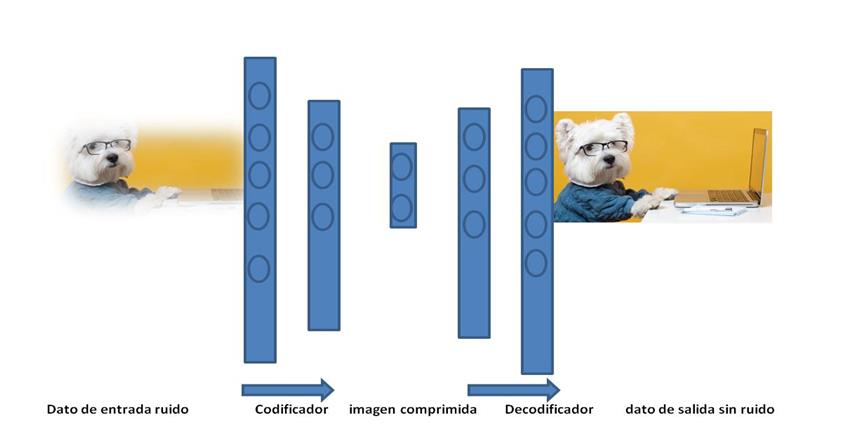

**Para el caso de deteccion de fraude la entrada seran las caracteristicas(features) de los datos**

Se tiene un archivo.csv que tiene unas caracteristicas y una columna llamada fraud=0 si no es fraudulento el pago bancario,fraud=1 si es fraudulento.

Trabajara con los siguientes datos libres:

Fraud Detection on Bank Payments(Detección de fraude en pagos bancarios)
Obtenido de:


*   https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments/notebook




**Importemos la librería pandas y carguemos el archivo csv**

In [2]:
import pandas as pd   # importa la librería pandas
dataframe=pd.read_csv('fraude.csv',delimiter=',') # lee el archivo csv, utiliza pd.read_csv('nombre_del_archivo.csv')
dataframe   # Con el nombre del dataframe en este caso data_frame puede ver su contenido.

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


los datos tienen 9 columnas(características,features,9 columnas) and a target column(fraude o no fraude). The feature(características de las columnas son :

*   Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
*   Customer: This feature represents the customer id

*   zipCodeOrigin: The zip code of origin/source.
*   Merchant: The merchant's id
zipMerchant: The merchant's zip code

*   Age: Categorized age
0: <= 18,
1: 19-25,
2: 26-35,
3: 36-45,
4: 46:55,
5: 56:65,
6: > 65
U: Unknown
*   Gender: Gender for customer
E : Enterprise,
F: Female,
M: Male,
U: Unknown

*   Category: Category of the purchase
*   Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)


In [3]:
dataframe.head(5) #Muestra las 5 primeras filas

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
dataframe.tail() #Muestra las 5 últimas filas

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


**Dimensión y nombre de las columnas**

In [5]:
print("Shape: ", dataframe.shape)# Dimensión del dataframe:filas y columnas
print("Columnas: ", dataframe.columns)# Nombre de las columnas del dataframe.

Shape:  (594643, 10)
Columnas:  Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')


In [6]:
dataframe['amount'].describe()#Muestra los valores descriptivos de la columna monto de la transacción.

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

**Imprime información sobre las características o variables**

In [7]:
print(dataframe.info())
print("\nConteo de valores únicos:\n")
print(dataframe.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None

Conteo de valores únicos:

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64


**Valores faltantes**

In [8]:
print("Are There Missing Data(hay valores faltantes)? :",dataframe.isnull().any().any())
print(dataframe.isnull().sum())

Are There Missing Data(hay valores faltantes)? : False
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [9]:
# Cargar las librerias

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# operating system
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


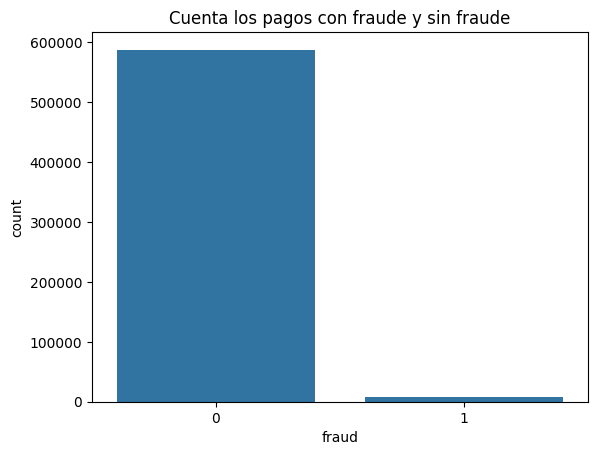

Número  normal de pagos :  587443
Número de fraudes:  7200


In [10]:


# Se crea 2 dataframes uno con fraude y otro sin fraude
df_fraud = dataframe.loc[dataframe.fraud == 1]
df_non_fraud = dataframe.loc[dataframe.fraud == 0]

sns.countplot(x="fraud",data=dataframe)
plt.title("Cuenta los pagos con fraude y sin fraude")
plt.show()
print("Número  normal de pagos : ",df_non_fraud.fraud.count())
print("Número de fraudes: ",df_fraud.fraud.count())


**Gráfico dinámico o interactivo con la librería plotly**

In [11]:
import plotly.express as px
fig = px.histogram(dataframe, x='fraud', histfunc='count')
fig.show()

In [12]:
print("valor promedio de las caracteristicas por categoría monto y fraude",dataframe.groupby('category')['amount','fraud'].mean())

valor promedio de las caracteristicas por categoría monto y fraude                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


<ipython-input-12-42678934ff6e>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



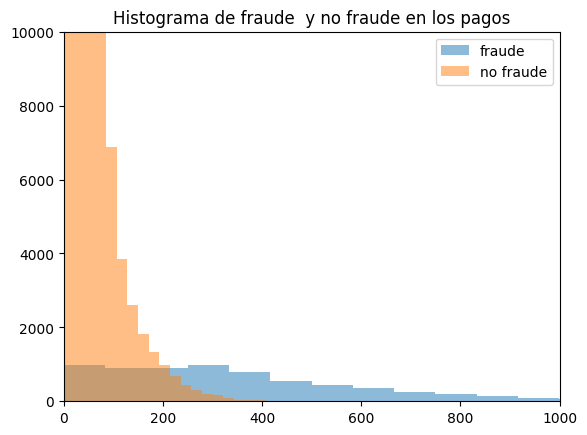

In [13]:
#  histograma por monto con fraude y sin fraude
plt.hist(df_fraud.amount, alpha=0.5, label='fraude',bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='no fraude',bins=100)
plt.title("Histograma de fraude  y no fraude en los pagos")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

**Las columnas zipCodeOri y zipMerchant tienen la misma información, borrar una columna para que quede una sola información para borrar se utiliza drop**

In [14]:
print("Unique zipCodeOri values: ",dataframe.zipcodeOri.nunique())
print("Unique zipMerchant values: ",dataframe.zipMerchant.nunique())
# drop zipcodeori y zipMerchant para tener un valor unico
data_reducida = dataframe.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


**Observemos las columnas resultantes:**

In [15]:
data_reducida.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [16]:
# Cambiando las columnas a categoricas
col_categorical = data_reducida.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reducida[col] = data_reducida[col].astype('category')
# valores categoricos ==> valores numericos# Las categorias se cambian por números.
data_reducida[col_categorical] = data_reducida[col_categorical].apply(lambda x: x.cat.codes)
data_reducida.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el scaler
scaler = MinMaxScaler()

# Seleccionar las características para normalizar
features_to_normalize = ['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount']

# Normalizar las características seleccionadas
data_reducida[features_to_normalize] = scaler.fit_transform(data_reducida[features_to_normalize])

# Mostrar los datos normalizados
print(data_reducida.head(5))

   step  customer       age    gender  merchant  category    amount  fraud
0   0.0  0.051082  0.571429  0.666667  0.612245  0.857143  0.000546      0
1   0.0  0.669667  0.285714  0.666667  0.612245  0.857143  0.004764      0
2   0.0  0.555826  0.571429  0.333333  0.367347  0.857143  0.003228      0
3   0.0  0.401362  0.428571  0.666667  0.612245  0.857143  0.002071      0
4   0.0  0.872051  0.714286  0.666667  0.612245  0.857143  0.004288      0


In [18]:
data_reducida

,step,customer,age,gender,merchant,category,amount,fraud
0,0.0,0.051082,0.571429,0.666667,0.612245,0.857143,0.000546,0
1,0.0,0.669667,0.285714,0.666667,0.612245,0.857143,0.004764,0
2,0.0,0.555826,0.571429,0.333333,0.367347,0.857143,0.003228,0
3,0.0,0.401362,0.428571,0.666667,0.612245,0.857143,0.002071,0
4,0.0,0.872051,0.714286,0.666667,0.612245,0.857143,0.004288,0
...,...,...,...,...,...,...,...,...
594638,1.0,0.398686,0.428571,0.333333,0.367347,0.857143,0.002465,0
594639,1.0,0.819509,0.571429,0.333333,0.367347,0.857143,0.006090,0
594640,1.0,0.128679,0.285714,0.333333,0.632653,0.142857,0.002694,0
594641,1.0,0.263440,0.714286,0.666667,0.367347,0.857143,0.001736,0






*   **Entrenamos el modelo 80% para entrenamiento 20%=0.2=test_size es 20% para prueba o testing.**
*   **El autoencoder será entrenado únicamente con registros normales,transacciones no fraudulentas para que de esta forma aprenda a obtener una representación compacta de esos datos normales, no fraudulentos**

*   **Mientras que el de validación (test) o prueba tendrá los dos tipos de registros (normales y fraudulentos)**






In [19]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separar características y etiquetas
X = data_reducida.drop('fraud', axis=1)
y = data_reducida['fraud']

# Aplicar sobremuestreo ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Normalizar las características
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos después del preprocesamiento
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (939644, 7)
Forma de X_test: (234911, 7)
Forma de y_train: (939644,)
Forma de y_test: (234911,)



**AUTOENCODER: 7-6-4-6-7, las funciones de activación son tangente hiperbolica(tanh),y Relu en el siguiente orden:tanh-relu-tanh-relu**

In [20]:
dim_entrada = X_train.shape[1]

In [21]:
dim_entrada

7

In [39]:
import numpy as np
np.random.seed(5)  # un valor semilla para poder repetir el modelo
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

dim_entrada = X_train.shape[1]  # número de elementos de entrada=7 son las 7 caracteristicas o features
capa_entrada = Input(shape=(dim_entrada,))

# Encoder
encoder = Dense(64, activation='elu')(capa_entrada)
encoder = Dropout(0.2)(encoder)
encoder = Dense(256, activation='elu')(encoder)
encoder = Dropout(0.2)(encoder)
encoder = Dense(16, activation='elu')(encoder)
encoded = Dense(8, activation='elu')(encoder)

# Decoder
decoder = Dense(16, activation='elu')(encoded)
decoder = Dropout(0.2)(decoder)
decoder = Dense(256, activation='elu')(decoder)
decoder = Dropout(0.2)(decoder)
decoder = Dense(64, activation='elu')(decoder)
decoder = Dropout(0.1)(decoder)
decoded = Dense(dim_entrada, activation='elu')(decoder)

# Define el optimizador con la tasa de aprendizaje
optimizer = Adam(learning_rate=0.001)

# Compila el modelo con el optimizador
autoencoder = Model(inputs=capa_entrada, outputs=decoded)
autoencoder.compile(optimizer=optimizer, loss='mse')

nits = 5  # epocas, numero de iteracciones
tam_lote = 64  # tamaño del lote
autoencoder.fit(X_train, X_train, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test, X_test), verbose=1)

Epoch 1/5
14682/14682 [==============================] - 93s 6ms/step - loss: 0.1374 - val_loss: 0.0596
Epoch 2/5
14682/14682 [==============================] - 86s 6ms/step - loss: 0.1039 - val_loss: 0.0671
Epoch 3/5
14682/14682 [==============================] - 89s 6ms/step - loss: 0.0977 - val_loss: 0.0615
Epoch 4/5
14682/14682 [==============================] - 88s 6ms/step - loss: 0.0945 - val_loss: 0.0610
Epoch 5/5
14682/14682 [==============================] - 88s 6ms/step - loss: 0.0918 - val_loss: 0.0642


In [23]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                4112      
                                                                 
 dense_3 (Dense)             (None, 8)                 136   

7341/7341 [==============================] - 15s 2ms/step


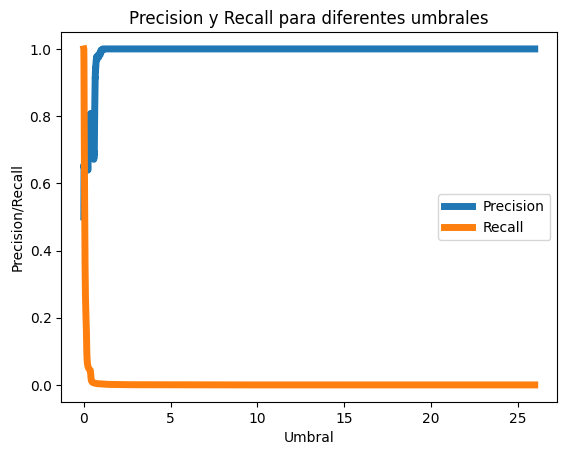

[[ 55494  61963]
 [  7466 109988]]
              precision    recall  f1-score   support

           0       0.88      0.47      0.62    117457
           1       0.64      0.94      0.76    117454

    accuracy                           0.70    234911
   macro avg       0.76      0.70      0.69    234911
weighted avg       0.76      0.70      0.69    234911

Accuracy score: 0.7044455134072053


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, accuracy_score


# Predicción X_test -> Autoencoder -> X_pred
X_pred = autoencoder.predict(X_test)
ecm = np.mean(np.power(X_test - X_pred, 2), axis=1)

# Gráfica precision-recall para determinar el umbral
precision, recall, umbral = precision_recall_curve(y_test, ecm)
plt.plot(umbral, precision[1:], label="Precision", linewidth=5)
plt.plot(umbral, recall[1:], label="Recall", linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

# Encontrar el umbral óptimo basado en alguna métrica
f1_scores = 2 * recall[1:] * precision[1:] / (recall[1:] + precision[1:])
optimal_threshold = umbral[np.argmax(f1_scores)]


Y_pred = [1 if e > optimal_threshold else 0 for e in ecm]
conf_matrix = confusion_matrix(y_test, Y_pred)
print(conf_matrix)

# Reporte de clasificación y accuracy
print(classification_report(y_test, Y_pred))
print('Accuracy score:', accuracy_score(y_test, Y_pred))


<p>

Matriz de confusión:

**Predicción:** | **Normal** | **Fraude** |  
--- | ---  | ---   |
**Real:** | ----- | ----- |
**Normal** | **117512** | **0** |
**Fraude** | **1417** | **0** |

</p>

<p>
FP:Falso positivo:normal clasificado fraudulento
FN:Falso negativo:fraudulento clasificado normal

TN:Verdaderos negativos:normales clasifica normal

TP:Verdaderos positivos:fraudulentos clasificado fraudulento

Matriz de confusion:

**Predicción:** | **Normal** | **Fraude** |  
--- | ---  | ---   |
**Real:** | ----- | ----- |
**Normal** | **TN** | **FP** |
**Fraude** | **FN** | **TP** |

</p>

In [42]:
print('Accuracy score:',accuracy_score(y_test, Y_pred))

Accuracy score: 0.7044455134072053


**Accuracy score alto=98%  ¿Cómo cambiaría esto? ¿Que significa esa valor ?¿Esta favoreciendo a los registros fraudulentos?**

**La matriz de confunsión arroja unos valores cero por eso al calcular la medida de precision F-score da indeterminado al dividir por el número cero. ¿Cómo arreglaría esto?**

De 118929 datos ,117512  eran normales y fueron clasificados como normales. 1417 eran fraudulentos y se clasificaron como normales.¿Cómo arreglaría esto?

# **Realice lo siguiente:**
**¿Como mejoraría el modelo anterior?**
**¿Ese modelo esta funcionando?**
Los datos estan desbalanceados
Numero  normal :  587443
Numero de fraudes:  7200¿Cómo lo arreglaria?
**Los valores que arroja la matriz de confunción ¿estan bien? a ¿que corresponden? varie el valor del umbral para obtener un recall alto,varie el valor del umbral para obtener un precision alto,interprete los resultados**
**.Cambie los valores del encoder y decoder para construir el autoencoder y las funciones de activación. En el ejemplo de arriba esta:AUTOENCODER: 7-6-4-6-7, las funciones de activación son tangente hiperbolica(tanh),y Relu en el siguiente orden:tanh-relu-tanh-relu. Observe los resultados**

Ejemplo 7-5-4-5-7


*   Modifique el tipo de optimizador diferente a optimizer='adam'
*   Modifique los valores de learning rate, ejemplo lr=0.001

*   Modifique epochs,batch_size,ejemplo epochs=10, batch_size=120

*   Agregue una capa oculta al modelo con 256 neuronas.

*   Modifique Dropout, ejemplo Dropout=0.2. Esto permite excluir aleatoriamente el 20% de las neuronas en el entrenamiento para evitar el sobreajuste


*   Modifique loss dentro de model.compile(), diferente a loss='categorical_crossentropy'

*   Imprima las capas de neuronas del modelo print(model.summary())

*   Guarde el modelo model.save('modeloinicial.h5')# pip install h5py

*  Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')
*   Analice los resultados

# **Preguntas orientadoras**
### ***¿Cuáles son las aplicaciones de un autoencoder?***

Los autoenconders han demostrado gran versatilidad en multiples campos para su aplicación,
desde el procesamiento digital de imágenes hasta detección de anomalías en datos. A continuación
se presentan algunas de sus aplicaciones mas comunes

Autoencoder de eliminación de ruido (DAE): En la arquitectura DAE, la entrada se introduce con ruido
estocástico. El DAE recrea la entrada e intenta eliminar el ruido. La función de pérdida del DAE
compara la salida recreada con la entrada original incorrecta.

Compresión de imágenes: El uso de autoencoders para la compresión de imágenes es utilizado para reducir
las dimensiones de una imágen de entrada a través de una red neuronal y luego intenta reconstruir la imágen
original a partir de la representación comprimida. Se han evidenciado resultados viables en el uso de esta
técnica, pero dependerá del tipo de formato de la imágen ya que en formato JPEG muestra resultados optimos
y mas utilizados en la industria.



### ***¿Cómo se realiza la detección de fraudes mediante autoencoder en Python?***

La detección de transacciones fraudulentas en tarjetas de crétdito mediante el uso de modelos de Machine Learning,
implica un entremaniento de autoencoder con un conjunto de datos que incluyen transacciones realizadas con exito y transacciones
clasificadas como fraudulentas. La función del autoencoder será aprender a identificar las transacciones normales y por lo tanto
cuando se enfrente a una transacción fraudulenta podrá detectarla ya que no se ajustan a los patrones previamente aprendidos.



## **Preparación de los datos**

Se carga el dataset proporcionado Fraud Detection on Bank Payments, el conjunto de datos tiene 9 columnas de características y una columna de destino. Las columnas de características son :

Step: Esta característica representa el día desde el inicio de la simulación. Tiene 180 pasos, por lo que la simulación duró prácticamente 6 meses.
Customer: Esta característica representa el identificador del cliente
zipCodeOrigin: El código postal de origen/fuente.
Merchant: El id del comerciante
zipMerchant: El código postal del comerciante
Age: Edad categorizada
0: <= 18,
1: 19-25,
2: 26-35,
3: 36-45,
4: 46:55,
5: 56:65,
6: > 65
U: Desconocido
Gender: Sexo del cliente
E : Empresa
F: Mujer
M: Masculino,
U: Desconocido
Category: Categoría de la compra. No escribiré todas las categorías aquí, las veremos más adelante en el análisis.
Amount: Importe de la compra
Fraud: Variable objetivo que muestra si la transacción es fraudulenta(1) o benigna(0)






**1. ¿Cómo cambiaría el accuracy score alto del 98%?**

Para cambiar este valor se podrían realizar mejoras al modelo del autoencoder, por otro lado, se podría ajustar el umbral de clasificación y emplear técnicas de balanceo de clases para un mejor manejo de los datos.

**2. ¿Qué significa ese valor?**

Accuracy score de 98% significa que el modelo es bueno identificando las transacciones que no son fraudulentas correctamente, sin embargo, gracias al desbalanceo de datos, es alto valor representa la capacidad del modelo para reconocer la clase mayoritaria que es la de no fraudulentos

**3. ¿Está favoreciendo a los registros fraudulentos?**

No, el modelo no está favoreciendo a los registros fraudulentos. Por el contrario, está favoreciendo en gran medida a los registros no fraudulentos.

**4. La matriz de confusión arroja unos valores cero por eso al calcular la medida de precisión F-score da indeterminado al dividir por el número cero. ¿Cómo arreglaría esto?**

Se podría arreglar aplicando técnicas de balanceo para mejorar la selección de características y aumentar la sensibilidad de la clase minoritaria que seria la de datos fraudulentos.

**5. De 118929 datos, 117512 eran normales y fueron clasificados como normales. 1417 eran fraudulentos y se clasificaron como normales. ¿Cómo arreglaría esto?**

Implementar técnicas de balanceo de clases, como el oversampling de las transacciones fraudulentas

# **Desarrollo**

Se implementaron los valores propuestos en el ejercicio, con lo cual se obtuvo el siguiente resultado:

 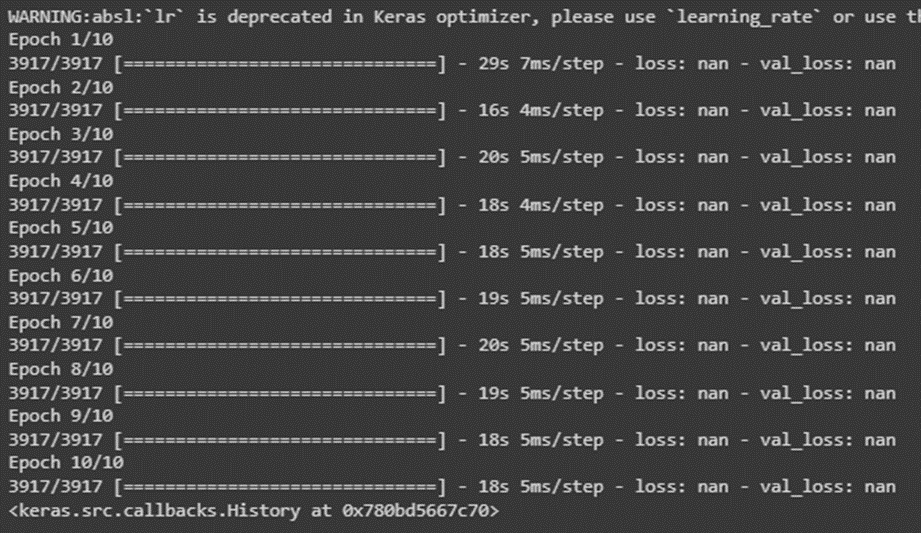


El resultado de entrenar el modelo con los parámetros anteriores indica un problema de entrenamiento ya que se muestra 'nan' como resultado de la perdida y la perdida de validación, probablemente esto es relacionado a la elección del método categorical_cossentropy ya que el autoencoder no está diseñado para clasificación, por el contrario son datos continuos y buscan reconstruir las entradas originales en lugar de clasificarlas.

Se implementaron los siguientes cambios para intentar mejorar el modelo:

Encoder: Se implementa una modificación en el modelo y se crea una capa densa de 64 neuronas con activación de tipo elu, seguido Dropout de 0.2 para reducir el overfitting. Se crean dos capas densas adicionales de 256 neuronas cada una, con activación elu y Dropout de 0.2. Por último, una capa densa de 64 neuronas y activación tipo elu. Decoder: El Decoder implementado este compuesto por una arquitectura similar al encoder pero funciona de forma inversa, es decir, compuesta desde 64 neuronas hasta 256 en dos momentos, el primero para evitar el overfitting y una capa final en el decodificador, con igual número de neuronas en entrada. Optimizador: Para la optimización elige Adam y una tasa de aprendizaje o lr de 0.001. Una vez compilado el modelo se especifica mse (error cuadrático medio) como función de pérdida. Con estos parámetros se reduce la diferencia entre los datos de entrada y la reconstrucción. Entrenamiento: Para las pruebas de entrenamiento el modelo los datos de X_train tanto como entrada como salida, y que se logre el aprendizaje de reconstrucción de la entrada. El número de épocas será de 5 y un tamaño de lote 64.

Se pudo observar que el valor de perdida se acerco cada vez mas a 0 a diferencia del primer ejercicio propuesto:

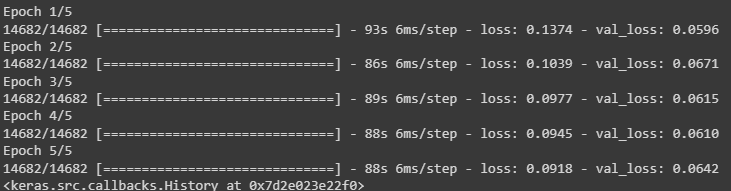

Luego de esto se obtuvieron los siguientes resultados:

La matriz de confusión muestra lo siguiente:
•	55494 son verdaderos positivos (transacciones normales)
•	61963 son falsos negativos (fraudes no detectados).
•	7466 son falsos (transacciones normales clasificadas como fraudes).
•	109988 son verdaderos negativos (fraudes correctamente detectados).

El puntaje de exactitud del modelo es 0.70 (70%), lo que significa que el 70% de todas las clasificaciones hechas por el modelo fueron correctas.


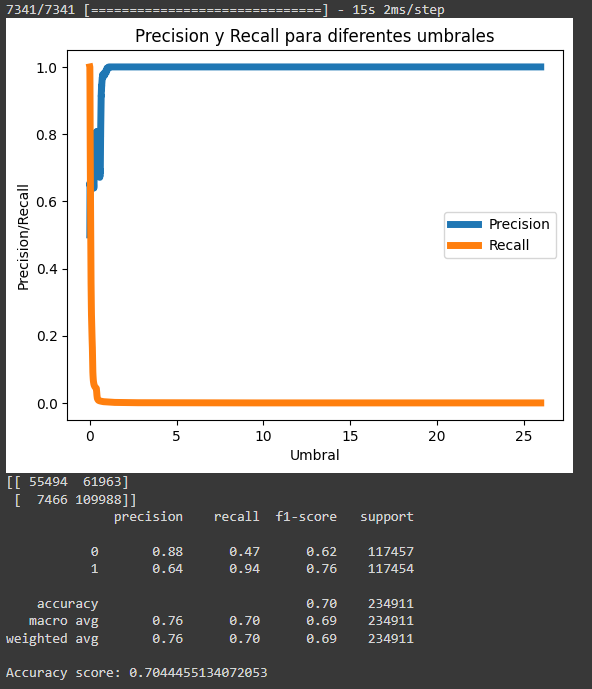

# **Conclusiones**

Se pudo determinar que la preparación de los datos es importante al momento de alimentar el modelo asegurándose de que las características del dataset sean relevantes y representen valor para la efectividad del sistema al momento de reconstruir las transacciones normales y fraudulentas.
Se pudo determinar que el desbalance de datos es un inconveniente que dificulta la construcción y evaluación de los modelos de Deep learning, especialmente en aplicaciones sensibles como la detección de fraudes ya que los modelos se inclinan hacia la clase mayoritaria comprometiendo la capacidad del modelo para identificar los casos de la clase minoritaria.
La precisión, recall, y el accuracy del modelo lograron una mejora significativa en la capacidad del modelo para diferenciar entre transacciones normales y fraudulentas. Alcanzando una exactitud del 70%
A pesar de las estrategias implementadas para abordar el desbalance de datos, el modelo aún requiere mejoras significativas para optimizar su rendimiento en la detección precisa de anomalías, particularmente en la identificación efectiva de la clase minoritaria (en este caso, transacciones fraudulentas).


# **Referencias**

### Castaño Palacio, O. (2023). Identificación de tareas motoras a través de algoritmos profundos de clasificación mediante la aplicación de Autoencoders Variacionales. Universidad del Quindío.

### Pérez González, G.  (2021). Detección de transacciones fraudulentas en tarjetas de crédito mediante el uso de modelos de Machine Learning. Universidad de los Andes.

### Bonaccorso, G. (2018). Mastering Machine Learning Algorithms: Expert Techniques to Implement Popular Machine Learning Algorithms and Fine-Tune your Models.

### Fandango, A. (2018). Mastering TensorFlow 1. x: Advanced Machine Learning and Deep Learning Concepts Using TensorFlow 1. x and Keras.